# 02 Simulated Annealinng

In [248]:
import pandas as pd 
tabla=pd.read_excel("datosCT.xlsx", sheet_name="8c").set_index("Unnamed: 0")

tabla

,Tijuana,Mérida,GDL,México,León,Monterrey,Tapachula,Chihuahua
Unnamed: 0,,,,,,,,
Tijuana,0,4180,2306,2848,2529,2409,4005,1583
Mérida,4180,0,1874,1332,1719,2046,1062,2819
GDL,2306,1874,0,542,223,789,1699,1202
México,2848,1332,542,0,389,933,1157,1487
León,2529,1719,223,389,0,711,1544,1140
Monterrey,2409,2046,789,933,711,0,1803,826
Tapachula,4005,1062,1699,1157,1544,1803,0,2644
Chihuahua,1583,2819,1202,1487,1140,826,2644,0


In [357]:
import numpy as np

def intercambio_posicion(R):
    R_aleatorias = R.copy()
    
   
    Rc1, Rc2 = np.random.choice(len(R_aleatorias), size=2, replace=False)
    
   
    R_aleatorias[Rc1], R_aleatorias[Rc2] = R_aleatorias[Rc2], R_aleatorias[Rc1]
    
    return R_aleatorias

R1 = ["Tijuana", "Mérida", "GDL", "México", "León", "Monterrey", "Tapachula", "Chihuahua"]


R2 = intercambio_posicion(R1)
R2


['Tijuana',
 'Mérida',
 'Monterrey',
 'México',
 'León',
 'GDL',
 'Tapachula',
 'Chihuahua']

#### Paso 1

In [359]:
T=1000
R1 = ["Tijuana", "Mérida", "GDL", "México", "León", "Monterrey", "Tapachula", "Chihuahua"]
R2 = intercambio_posicion(R1)
D1 = distancia_t(R1)
D2 = distancia_t(R2)
q= np.exp((D1 - D2)/T)
p = np.random.uniform(0, 1)
if p < q :
    R1 = R2.copy()


In [361]:
q

1.2840254166877414

In [363]:
p

0.8141139355952729

#### Paso 2 

In [365]:

N = 100
R1 = ["Tijuana", "Mérida", "GDL", "México", "León", "Monterrey", "Tapachula", "Chihuahua"]
rutas = [R1]

for _ in range(N):
    nueva_ruta = intercambio_posicion(R1)
    rutas.append(nueva_ruta)

distancias = [distancia_t(ruta) for ruta in rutas]

indice_minimo = np.argmin(distancias)
mejor_ruta = rutas[indice_minimo]
mas_corta = distancias[indice_minimo]

print(mejor_ruta)
mas_corta

['Tijuana', 'Mérida', 'Monterrey', 'México', 'León', 'GDL', 'Tapachula', 'Chihuahua']


946

#### Paso 3 

In [367]:
import numpy as np


def optimizacion_iteraciones(R1, T_inicial):
  
    T = T_inicial
    mejor_ruta = R1
    mejor_distancia = distancia_t(R1)
    
    n_iteraciones = calcular_iteraciones(T)
    
    i = 0
    while T > 1:

        R2 = intercambio_posicion(mejor_ruta)
        D2 = distancia_t(R2)
        if D2 < mejor_distancia:
            mejor_ruta = R2
            mejor_distancia = D2
        
        T *= 0.9
        i += 1
    
    return mejor_ruta, mejor_distancia, i

R1 = ["Tijuana", "Mérida", "GDL", "México", "León", "Monterrey", "Tapachula", "Chihuahua"]
T_inicial = 1000  

mejor_ruta, mejor_distancia, iteraciones = optimizacion_con_temperatura(R1, T_inicial)
print(mejor_ruta)
print(mejor_distancia)
print(iteraciones)


['GDL', 'Tapachula', 'México', 'Monterrey', 'León', 'Tijuana', 'Mérida', 'Chihuahua']
817
66


#### Paso 4 

In [369]:
def paso_4(T, M, N):
    rutas = []      
    distancias = [] 
    
    for m in range(M):
       
        ruta, distancia = paso_3(T, N)
        
     
        rutas.append(ruta)
        distancias.append(distancia)
        
    
        T *= 0.9 
        
    return rutas, distancias
T_inicial = 1000  
M = 100             
N = 30            
# Ejecutar el algoritmo
rutas, distancias = paso_4(T_inicial, M, N)

for i in range(M):
    print( i+1, rutas[i],distancias[i] )


1 ['GDL' 'Tapachula' 'Monterrey' 'Mérida' 'León' 'Chihuahua' 'Tijuana'
 'México'] 4798
2 ['México' 'Chihuahua' 'GDL' 'Monterrey' 'León' 'Tijuana' 'Mérida'
 'Tapachula'] 3750
3 ['Tapachula' 'México' 'Chihuahua' 'Mérida' 'GDL' 'Monterrey' 'Tijuana'
 'León'] 4428
4 ['GDL' 'Tijuana' 'México' 'Chihuahua' 'León' 'Mérida' 'Tapachula'
 'Monterrey'] 2930
5 ['León' 'Tapachula' 'Mérida' 'GDL' 'Chihuahua' 'Tijuana' 'Monterrey'
 'México'] 3553
6 ['Tapachula' 'León' 'Chihuahua' 'Monterrey' 'Mérida' 'México' 'Tijuana'
 'GDL'] 4080
7 ['Mérida' 'Monterrey' 'GDL' 'México' 'Chihuahua' 'Tapachula' 'León'
 'Tijuana'] 4651
8 ['León' 'México' 'Mérida' 'Chihuahua' 'Monterrey' 'Tijuana' 'Tapachula'
 'GDL'] 4249
9 ['Tijuana' 'GDL' 'Chihuahua' 'Mérida' 'León' 'Tapachula' 'México'
 'Monterrey'] 3316
10 ['Mérida' 'Monterrey' 'León' 'Tapachula' 'GDL' 'México' 'Tijuana'
 'Chihuahua'] 3585
11 ['Mérida' 'Tapachula' 'GDL' 'León' 'Chihuahua' 'Monterrey' 'Tijuana'
 'México'] 3537
12 ['León' 'Tapachula' 'México' 'Chihuahu

#### Paso 5 

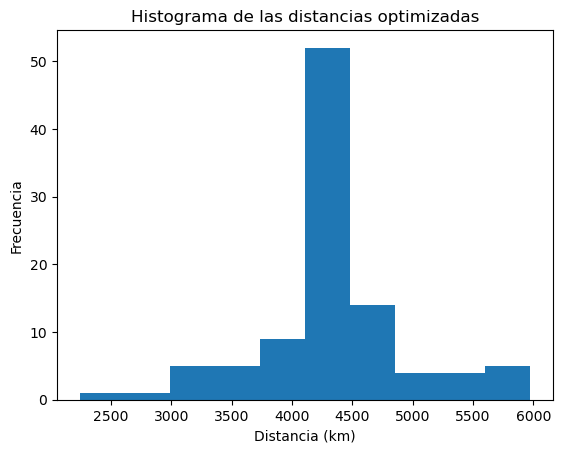

In [371]:
import matplotlib.pyplot as plt 
plt.hist(distancias)
plt.title("Histograma de las distancias optimizadas")
plt.xlabel("Distancia (km)")
plt.ylabel("Frecuencia")
plt.show()